In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import math

# Part 1: MAP

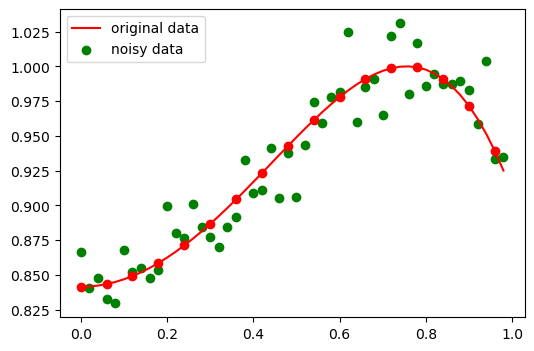

In [2]:
sigma = 0.02
x = np.arange(0,1,0.02)
y = np.sin(x*x + 1)
noise = np.random.normal(0,sigma,len(x))
y_noise = y + noise
plt.figure(figsize = (6,4))
plt.plot(x,y,'red',label = 'original data')
plt.plot(x,y,'or',markevery = 3)
plt.scatter(x,y_noise,color = 'green',label = 'noisy data')
plt.legend(loc=0)

In [3]:
def mAp(x,M,alpha):
    beta = 1/(sigma**2)
    data_length = len(x)
    t = np.zeros(data_length)
    X = np.zeros((data_length,M+1))
    for i in range(data_length):
        for j in range(M+1):
            X[i][j] = np.power(x[i],j)
        t[i] = y_noise[i]
    temp1 = linalg.inv(np.dot(X.T, X)+(alpha/beta)*np.identity(M+1))
    temp2 = np.dot(temp1,X.T)
    w = np.dot(temp2,t)
    print('MAP estimation w:\n',w)
    map_result = np.dot(X,w)    
    return map_result

In [4]:
def error_cal(predict,real):
    length = len(predict)
    result = 0
    for i in range(length):
        result = result + np.abs(predict[i] - real[i])
    return result

MAP estimation w:
 [ 0.81541863  0.35129308 -0.17990211]
total absolute error value:
 0.7852493954511879
MAP estimation w:
 [ 8.64603459e-01 -1.13718493e+00  1.50340299e+01 -6.33488724e+01
  3.91558471e+01  5.45344909e+02 -2.09540807e+03  3.70136181e+03
 -3.63302870e+03  1.91846755e+03 -4.26419791e+02]
total absolute error value:
 0.3161478113986529
MAP estimation w:
 [ 8.64782194e-01 -9.63758566e-01  1.59686196e+00  2.67434718e+02
 -3.83760825e+03  2.58861230e+04 -1.01059408e+05  2.36057895e+05
 -3.00714412e+05  9.22096325e+04  2.96460000e+05 -4.25294499e+05
  1.53648349e+05  1.15302938e+05 -1.19708580e+05  3.07847477e+04]
total absolute error value:
 14.127001917453912
MAP estimation w:
 [ 0.84514384  0.06641931  0.18532371 -0.02143091  0.53045297  0.05969231
 -0.51474436 -0.68292609 -0.45639819 -0.03931714  0.36268402  0.60628912
  0.61472154  0.36251927 -0.1420126  -0.87105551]
total absolute error value:
 0.23443478606094914
MAP estimation w:
 [ 0.84614084  0.04313457  0.24178821 

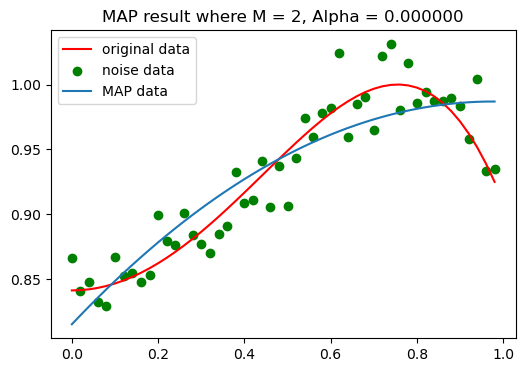

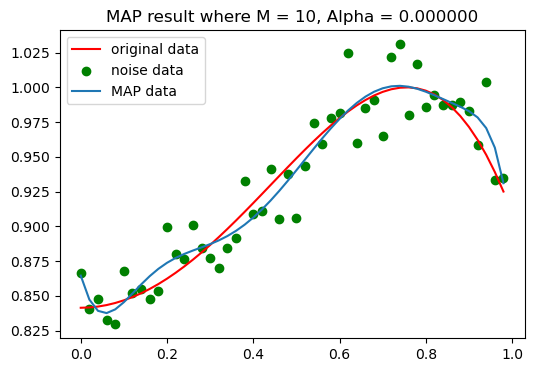

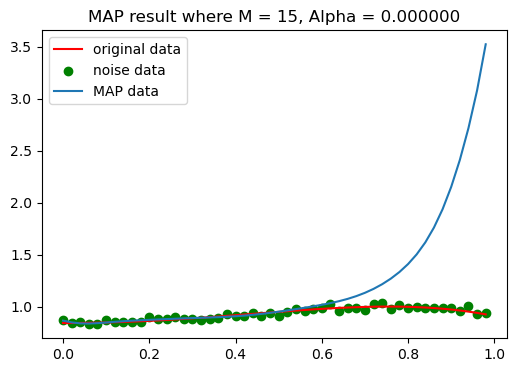

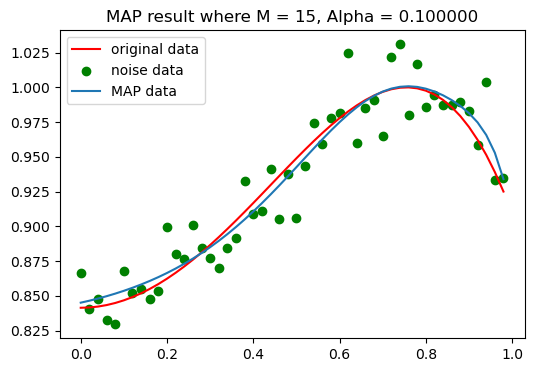

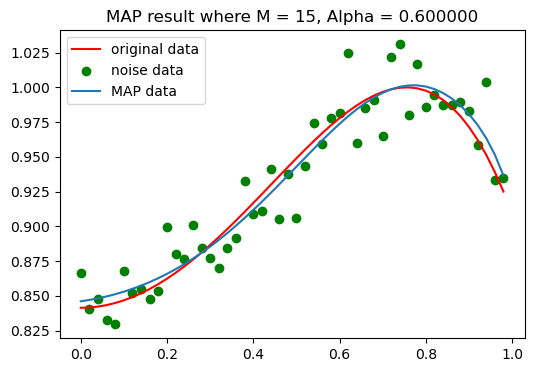

In [11]:
alpha = [0,0,0,0.1,0.6]
M = [2,10,15,15,15]
for i in range (5):
    map_result = mAp(x,M[i],alpha[i])
    plt.figure(figsize = (6,4))
    plt.plot(x,y,color = 'red',label = 'original data')
    plt.scatter(x,y_noise,color = 'green',label = 'noise data')
    plt.plot(x,map_result,label = 'MAP data')
    plt.legend(loc = 0)
    plt.title('MAP result where M = %d, Alpha = %f'%(M[i],alpha[i]))
    error = error_cal(map_result,y)
    print('total absolute error value:\n',error)


The figures shows the regression result when changing the model complexity M and constant alpha. The first three figure shows the effect of model complexity. M = 2 is a result of underfitting and M = 10 can be considered as a result of overfitting. To fix the overfitting problem, one method is increasing alpha without changing M. Figure 3,4,5 shows that we can get a proper fitting with larger alpha, which can be considered as a kind of optimization.

# Basis Function

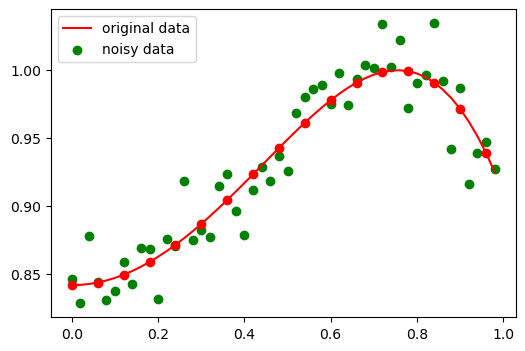

In [3]:
sigma = 0.02
x = np.arange(0,1,0.02)
y = np.sin(x*x + 1)
noise = np.random.normal(0,sigma,len(x))
y_noise = y + noise
plt.figure(figsize = (6,4))
plt.plot(x,y,'red',label = 'original data')
plt.plot(x,y,'or',markevery = 3)
plt.scatter(x,y_noise,color = 'green',label = 'noisy data')
plt.legend(loc=0)

In [4]:
def gau_func(x,u,s):
    result = np.exp(-(x-u)**2/2/(s*s))
    return result

In [5]:
def sig_func(x,u,s):
    a = (x-u)/s
    return (1/(1+np.exp(-a)))

Define a function to generate the gaussian centers

In [6]:
def equal_center(a,b,M,u):
    length = len(u)
    for i in range(length):
        u[i] = a + (i)*(b-a)/(M-1)
    return u

# #Gaussian

In [7]:
def basis_mle(n,M,s,u,y_noise):
    mat = np.zeros((n,M))
    data = np.zeros((n,1))
    for i in range (n):
        data[i] = y_noise[i]
    for j in range (M):
        if j == 0:
            mat[:,j] = 1      #first element(column) =0
        else:
            mat[:,j] = gau_func(x,u[j-1],s)
    
    #temp = np.dot(linalg.inv(np.dot(mat1.T,mat1)),mat1.T)
    w = np.dot(np.dot(linalg.inv(np.dot(mat.T,mat)),mat.T),data)
    result = np.dot(mat,w)
    return result

Text(0.5, 1.0, 'Gaussian Basis Function MLE properfitting, M = 5')

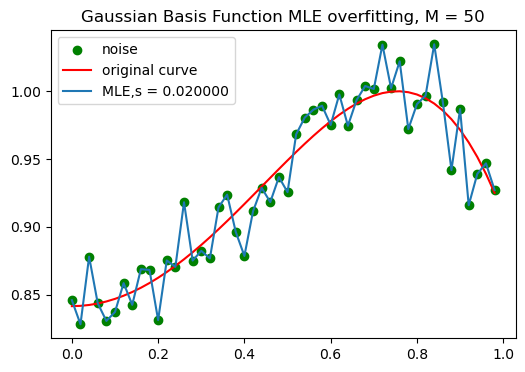

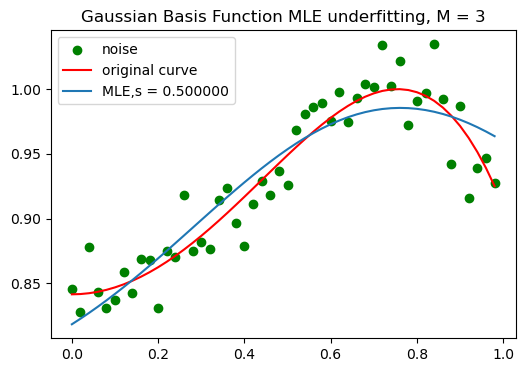

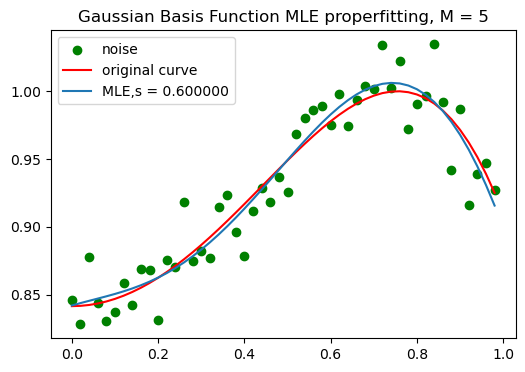

In [8]:
n = len(x)
M1 = 50
s1 = 0.02
M2 = 3
s2 = 0.5
M3 = 5
s3 = 0.6
a = min(y_noise)
b = max(y_noise)
u1 = np.arange(1/M1,1,1/M1)
u2 = np.arange(1/M2,1,1/M2)
u3 = np.arange(1/M3,1,1/M3)
plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,basis_mle(n,M1,s1,u1,y_noise),label = 'MLE,s = %f'%s1)
plt.legend(loc = 0)
plt.title('Gaussian Basis Function MLE overfitting, M = %d'%M1)

plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,basis_mle(n,M2,s2,u2,y_noise),label = 'MLE,s = %f'%s2)
plt.legend(loc = 0)
plt.title('Gaussian Basis Function MLE underfitting, M = %d'%M2)

plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,basis_mle(n,M3,s3,u3,y_noise),label = 'MLE,s = %f'%s3)
plt.legend(loc = 0)
plt.title('Gaussian Basis Function MLE properfitting, M = %d'%M3)

# #Sigmoid

In [9]:
def basis_mle2(n,M,s,u,y_noise):
    mat = np.zeros((n,M))
    data = np.zeros((n,1))
    for i in range (n):
        data[i] = y_noise[i]
    for j in range (M):
        if j == 0:
            mat[:,j] = 1      #first element(column) =0
        else:
            mat[:,j] = sig_func(x,u[j-1],s)
    
    #temp = np.dot(linalg.inv(np.dot(mat1.T,mat1)),mat1.T)
    w = np.dot(np.dot(linalg.inv(np.dot(mat.T,mat)),mat.T),data)
    result = np.dot(mat,w)
    return result

Text(0.5, 1.0, 'Sigmoid Basis Function MLE properfitting, M = 5')

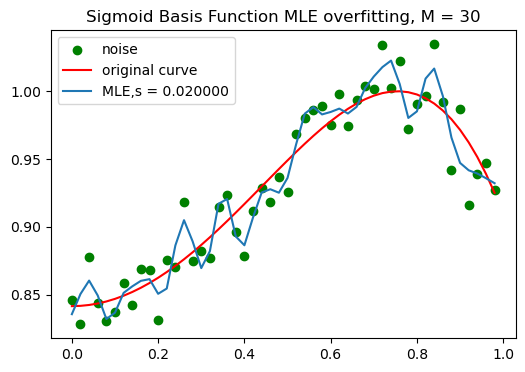

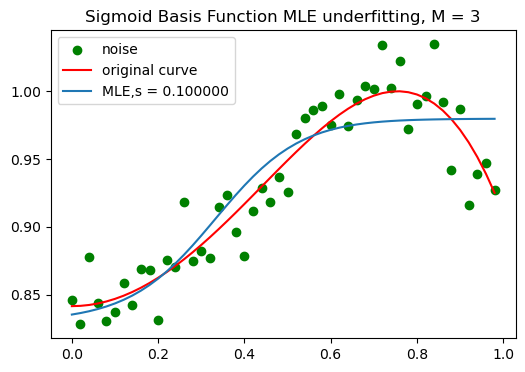

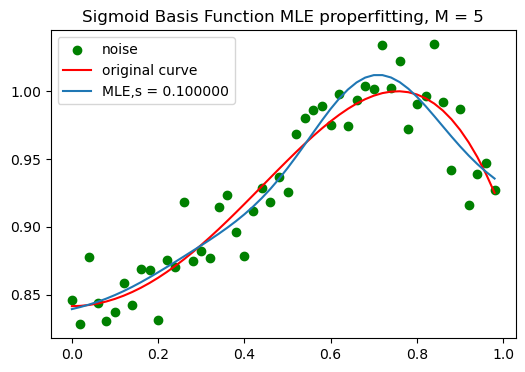

In [10]:
n = len(x)
M1 = 30
s1 = 0.02
M2 = 3
s2 = 0.1
M3 = 5
s3 = 0.1
a = min(y_noise)
b = max(y_noise)
u1 = np.arange(1/M1,1,1/M1)
u2 = np.arange(1/M2,1,1/M2)
u3 = np.arange(1/M3,1,1/M3)
plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,basis_mle2(n,M1,s1,u1,y_noise),label = 'MLE,s = %f'%s1)
plt.legend(loc = 0)
plt.title('Sigmoid Basis Function MLE overfitting, M = %d'%M1)

plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,basis_mle2(n,M2,s2,u2,y_noise),label = 'MLE,s = %f'%s2)
plt.legend(loc = 0)
plt.title('Sigmoid Basis Function MLE underfitting, M = %d'%M2)

plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,basis_mle2(n,M3,s3,u3,y_noise),label = 'MLE,s = %f'%s3)
plt.legend(loc = 0)
plt.title('Sigmoid Basis Function MLE properfitting, M = %d'%M3)

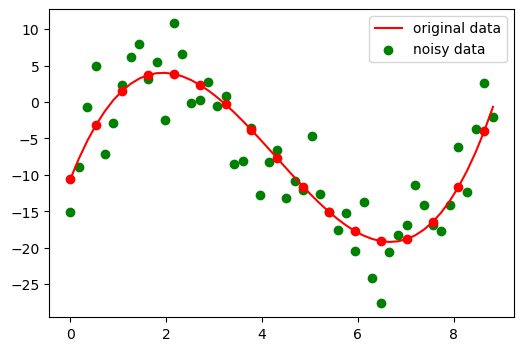

In [13]:
sigma = 4
x_ = np.arange(0,9,0.18)
y_ = 0.4345*x_**3-5.607*x_**2+16.78*x_-10.61
noise_ = np.random.normal(0,sigma,len(x_))
y_noise_ = y_ + noise_
plt.figure(figsize = (6,4))
plt.plot(x_,y_,'red',label = 'original data')
plt.plot(x_,y_,'or',markevery = 3)
plt.scatter(x_,y_noise_,color = 'green',label = 'noisy data')
plt.legend(loc=0)

Text(0.5, 1.0, 'Sigmoid Basis Function MLE properfitting, M = 6')

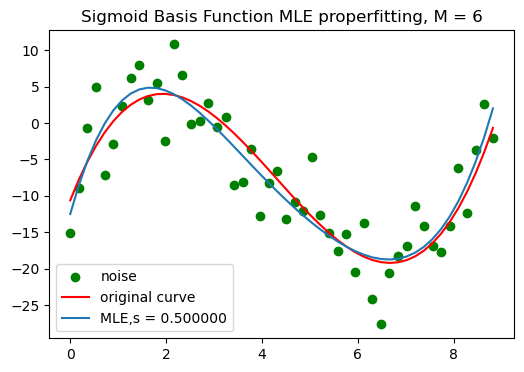

In [14]:
n = len(x)
M1 = 6
s1 = 0.5
#a = min(y_noise)
#b = max(y_noise)
u1 = np.arange(1/M1,1,1/M1)

plt.figure(figsize = (6,4))
plt.scatter(x_,y_noise_,color = 'green',label = 'noise')
plt.plot(x_,y_,color = 'red',label = 'original curve')
plt.plot(x_,basis_mle2(n,M1,s1,u1,y_noise_),label = 'MLE,s = %f'%s1)
plt.legend(loc = 0)
plt.title('Sigmoid Basis Function MLE properfitting, M = %d'%M1)

# Sigmoid Experiment

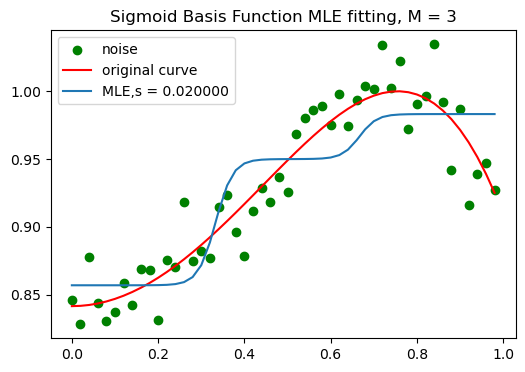

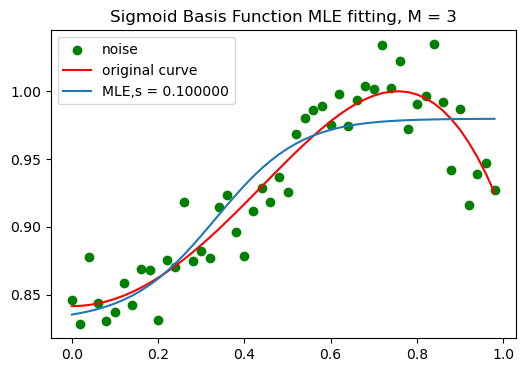

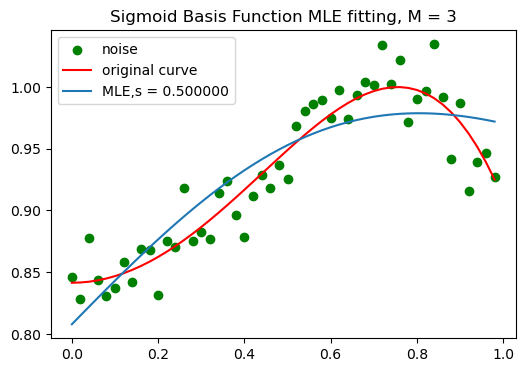

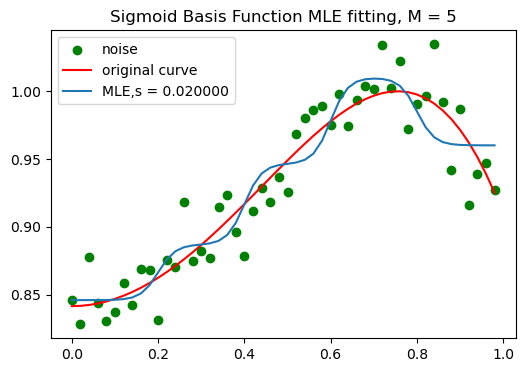

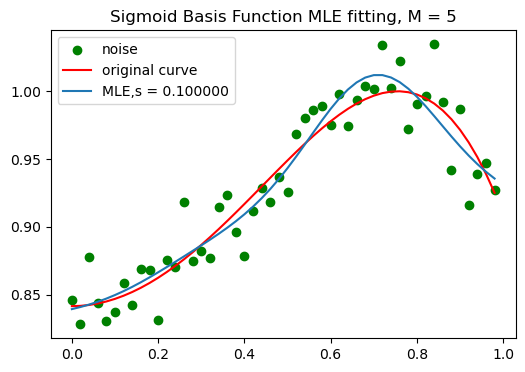

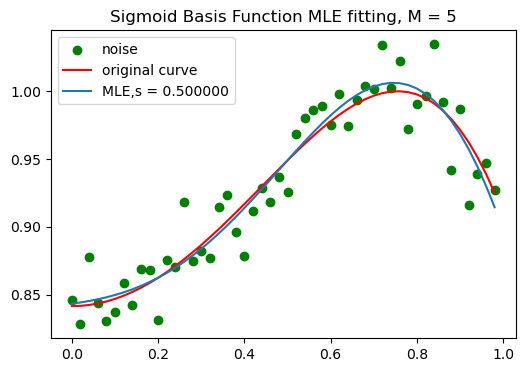

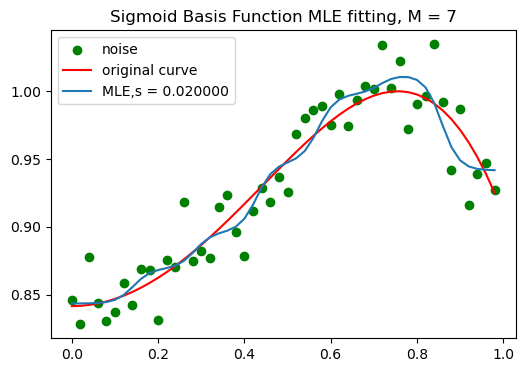

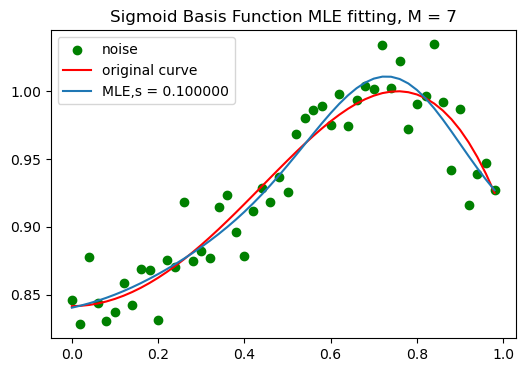

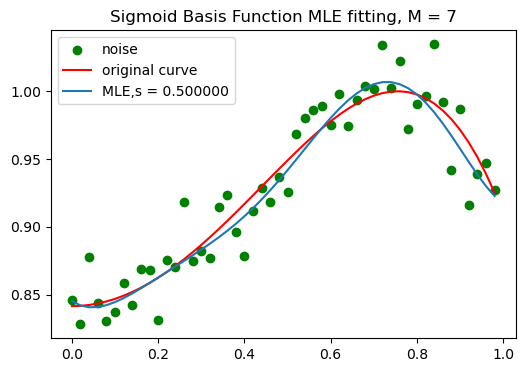

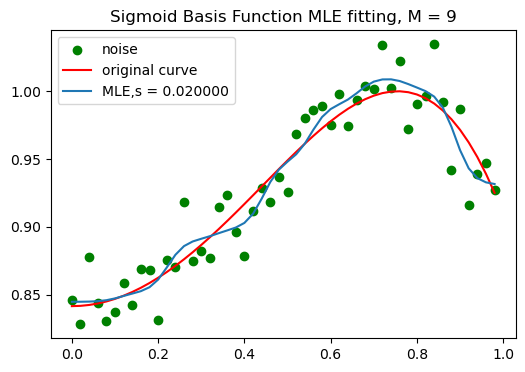

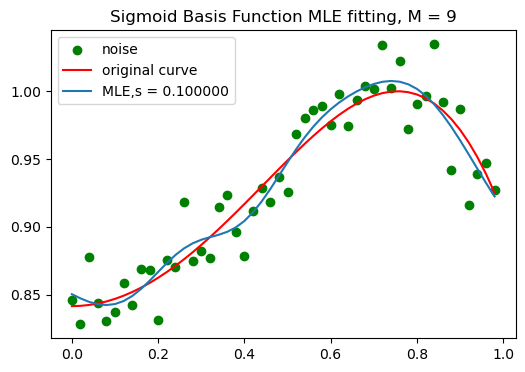

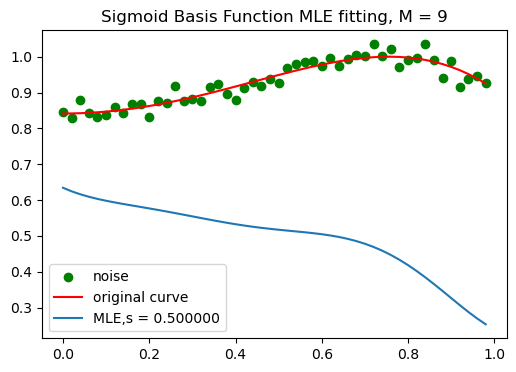

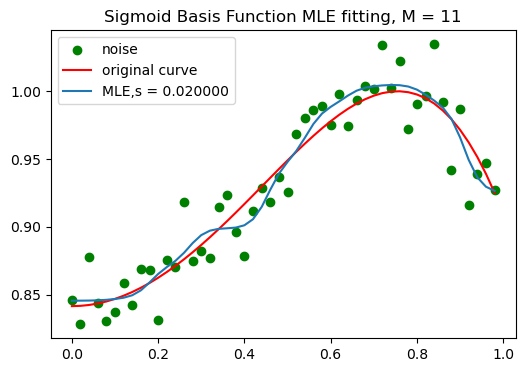

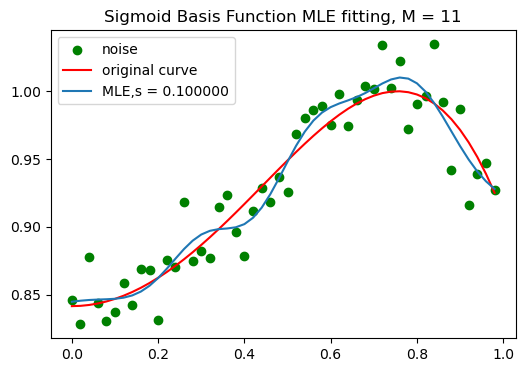

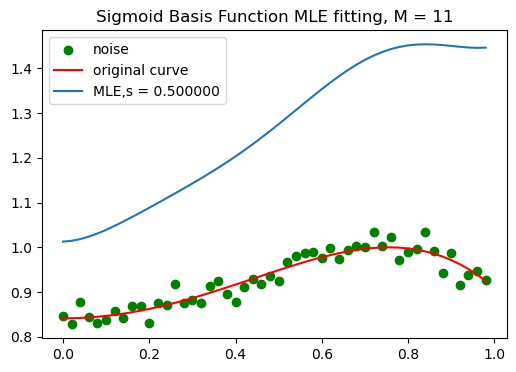

In [15]:
n = len(x)
M = [3,5,7,9,11]
s = [0.02,0.1,0.5]
for i in range(5):
    u = np.arange(1/M[i],1,1/M[i])
    for j in range(3):
        plt.figure(figsize = (6,4))
        plt.scatter(x,y_noise,color = 'green',label = 'noise')
        plt.plot(x,y,color = 'red',label = 'original curve')
        plt.plot(x,basis_mle2(n,M[i],s[j],u,y_noise),label = 'MLE,s = %f'%s[j])
        plt.legend(loc = 0)
        plt.title('Sigmoid Basis Function MLE fitting, M = %d'%M[i])

# Gaussian Experiment

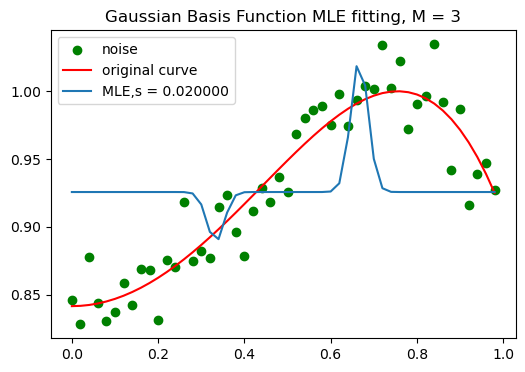

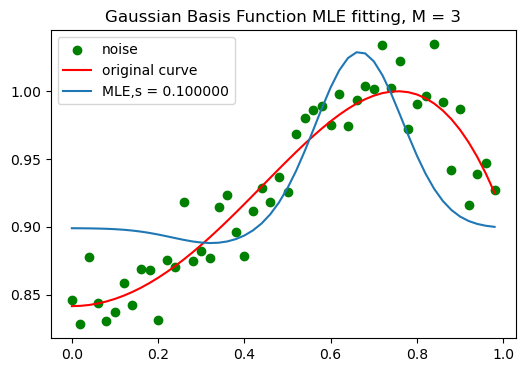

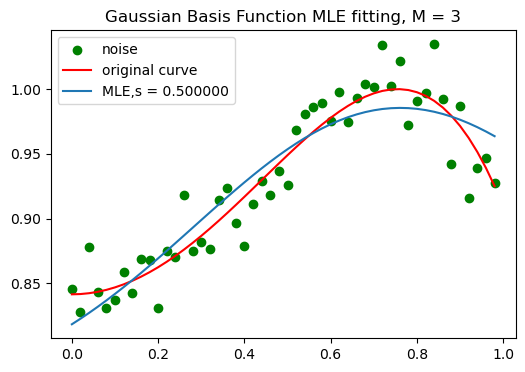

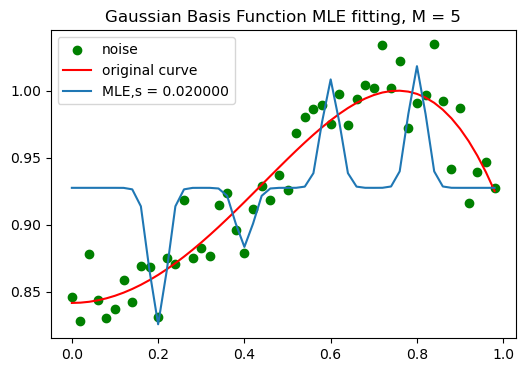

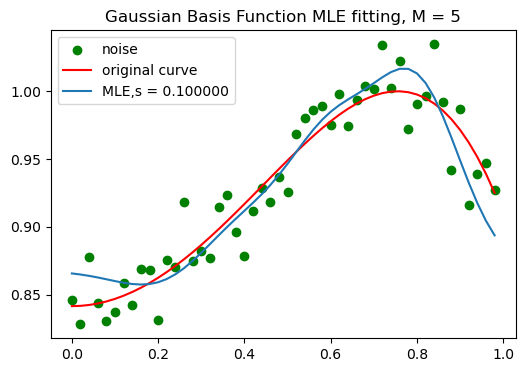

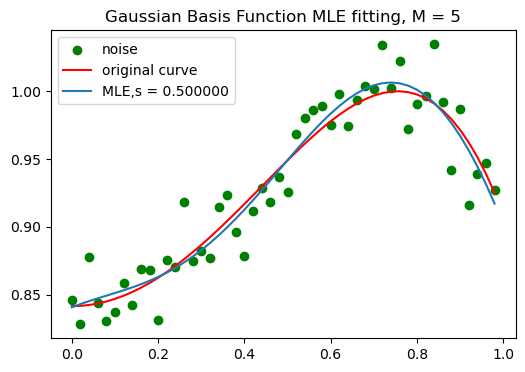

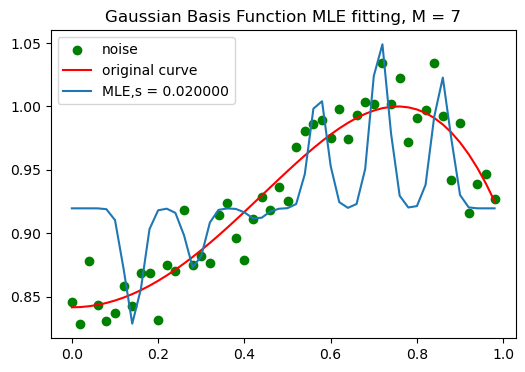

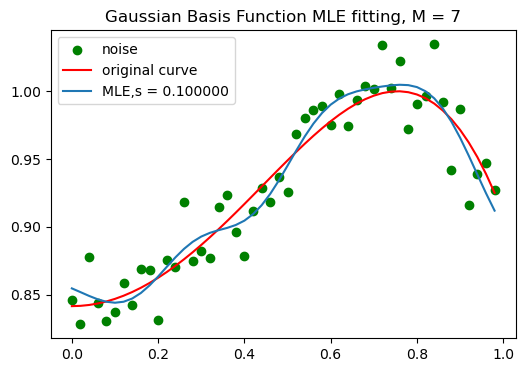

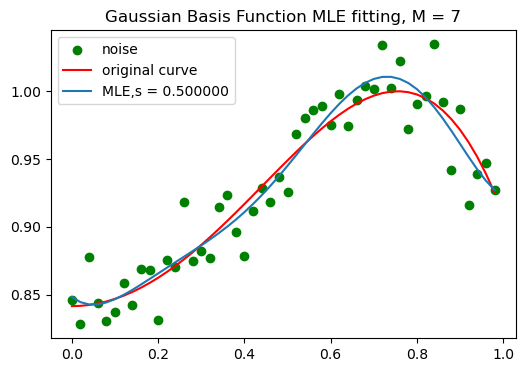

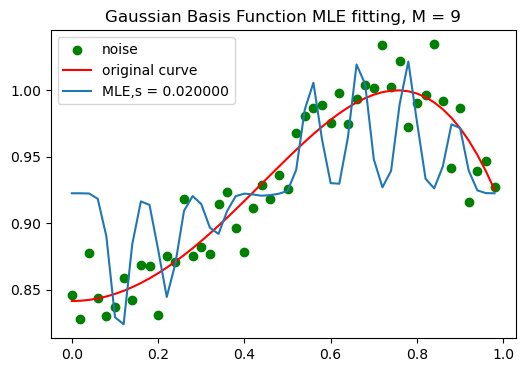

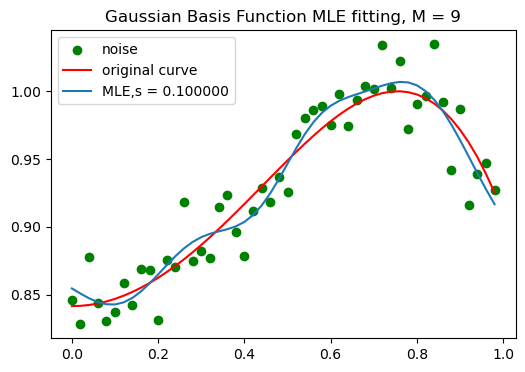

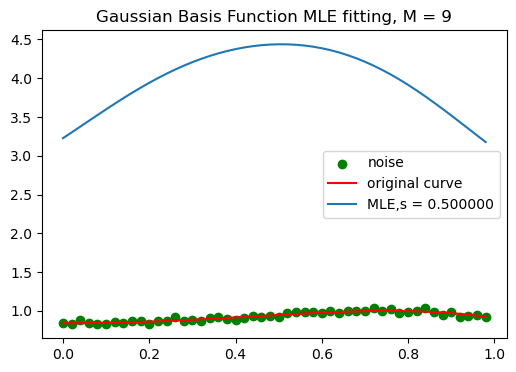

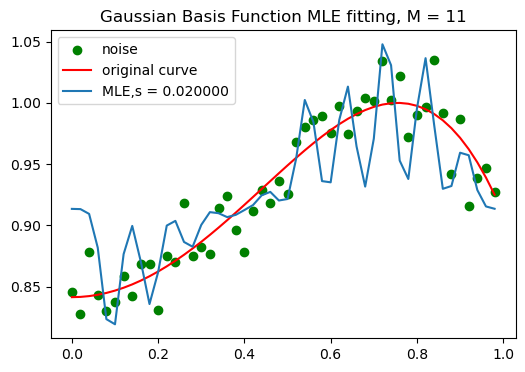

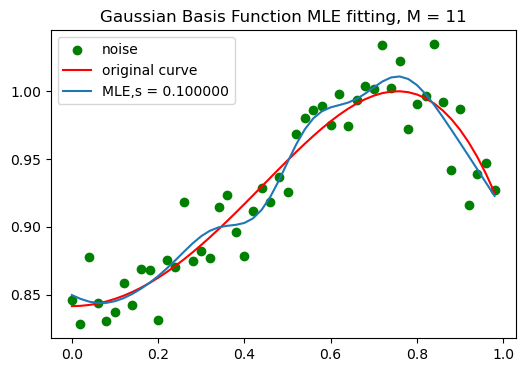

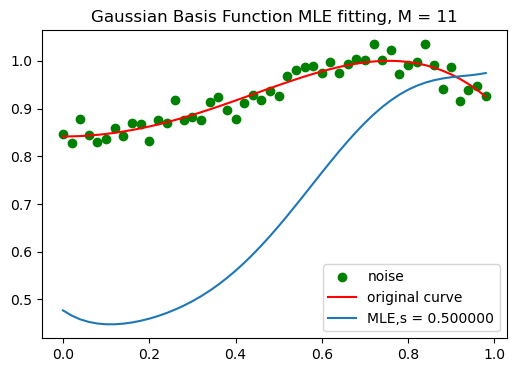

In [17]:
n = len(x)
M = [3,5,7,9,11]
s = [0.02,0.1,0.5]
for i in range(5):
    u = np.arange(1/M[i],1,1/M[i])
    for j in range(3):
        plt.figure(figsize = (6,4))
        plt.scatter(x,y_noise,color = 'green',label = 'noise')
        plt.plot(x,y,color = 'red',label = 'original curve')
        plt.plot(x,basis_mle(n,M[i],s[j],u,y_noise),label = 'MLE,s = %f'%s[j])
        plt.legend(loc = 0)
        plt.title('Gaussian Basis Function MLE fitting, M = %d'%M[i])

# Full Bayesian

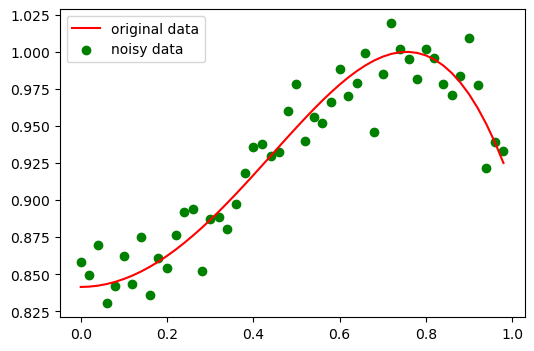

In [2]:
sigma = 0.02
x = np.arange(0,1,0.02)
y = np.sin(x*x + 1)
noise = np.random.normal(0,sigma,len(x))
y_noise = y + noise
plt.figure(figsize = (6,4))
plt.plot(x,y,'red',label = 'original data')
plt.scatter(x,y_noise,color = 'green',label = 'noisy data')
plt.legend(loc=0)

In [3]:
def gau_func(x,u,s):
    result = np.exp(-(x-u)**2/(2*s*s))
    return result

In [4]:
def fb(x,y,a,b,M,s):
    length = len(x)
    F=np.zeros([length,M])
    t=np.zeros([length,1])
    mat=np.zeros([M,1])
    I=np.identity(M)
    A=a*I
    
    for n in range(0,length):
        t[n]=y[n]
        for m in range(0,M):
            if m == 0:
                mat[0]=1
            else:
                u = m/M
                mat[m]=gau_func(x[n],u,s)
            F[n][m]=mat[m]
        
    
    ff=np.dot(F.T,F)
    temp=np.dot(b*linalg.inv(b*ff+A),F.T)# covariance matrix 
    w=np.dot(temp,t)
    result=np.dot(F,w)    
    print('w:',w)
    print('M =',M,'alpha =',a,'beta = ',b,'s =',s)
    return result

w: [[ 0.85689351]
 [-0.02742506]
 [ 0.05175901]
 [ 0.01860263]
 [ 0.11766405]]
M = 5 alpha = 0.1 beta =  10 s = 0.2


Text(0.5, 1.0, 'full bassian')

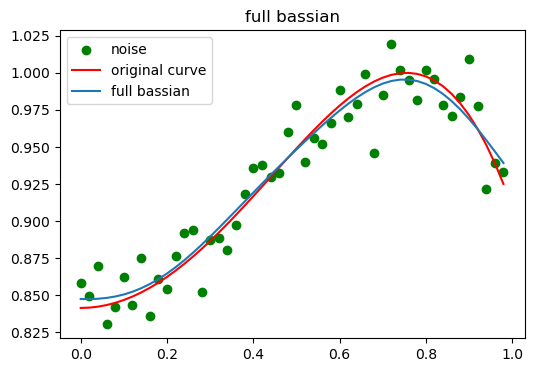

In [5]:
y_result=fb(x,y_noise,M=5,a=0.1,b=10,s=0.2)

plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,y_result,label = 'full bassian')
plt.legend(loc = 0)
plt.title('full bassian')

w: [[ 0.86625034]
 [-0.03792636]
 [ 0.05241426]
 [ 0.01549536]
 [ 0.10924537]]
M = 5 alpha = 0 beta =  10 s = 0.2
w: [[ 0.85689351]
 [-0.02742506]
 [ 0.05175901]
 [ 0.01860263]
 [ 0.11766405]]
M = 5 alpha = 0.1 beta =  10 s = 0.2
w: [[0.69402768]
 [0.14101473]
 [0.05204285]
 [0.07672032]
 [0.25132827]]
M = 5 alpha = 5 beta =  10 s = 0.2
w: [[0.7957988 ]
 [0.03990608]
 [0.04855447]
 [0.03914214]
 [0.17161898]]
M = 5 alpha = 5 beta =  50 s = 0.2


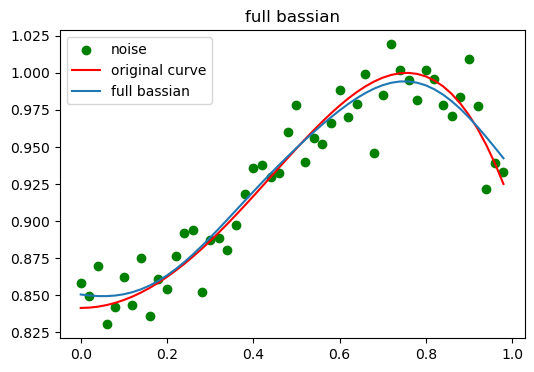

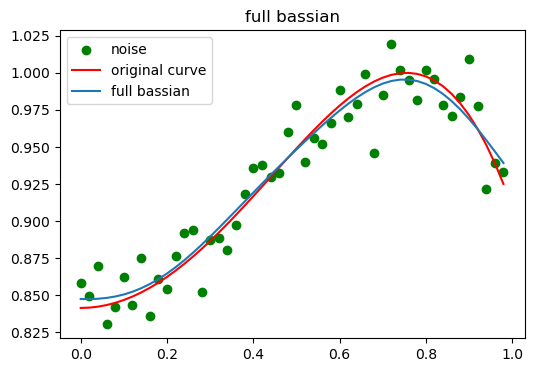

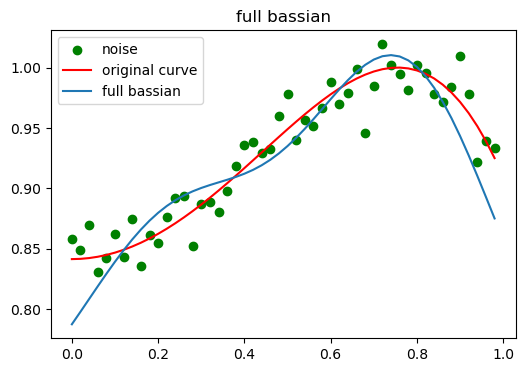

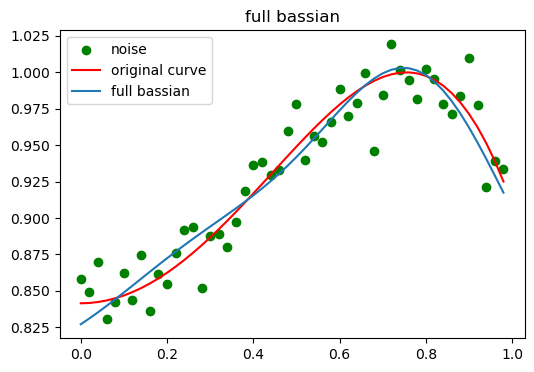

In [6]:
alpha = [0,0.1,5,5]
beta = [10,10,10,50]
for i in range (4):
    y_result=fb(x,y_noise,M=5,a=alpha[i],b=beta[i],s=0.2)
    plt.figure(figsize = (6,4))
    plt.scatter(x,y_noise,color = 'green',label = 'noise')
    plt.plot(x,y,color = 'red',label = 'original curve')
    plt.plot(x,y_result,label = 'full bassian')
    plt.legend(loc = 0)
    plt.title('full bassian')

best fitting

w: [[ 0.85689351]
 [-0.02742506]
 [ 0.05175901]
 [ 0.01860263]
 [ 0.11766405]]
M = 5 alpha = 0.1 beta =  10 s = 0.2


Text(0.5, 1.0, 'full bassian best fitting')

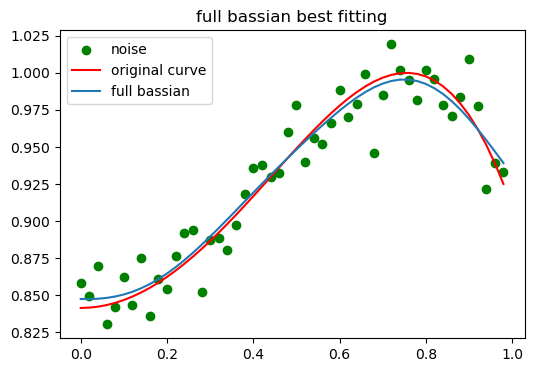

In [7]:
y_result=fb(x,y_noise,M=5,a=0.1,b=10,s=0.2)

plt.figure(figsize = (6,4))
plt.scatter(x,y_noise,color = 'green',label = 'noise')
plt.plot(x,y,color = 'red',label = 'original curve')
plt.plot(x,y_result,label = 'full bassian')
plt.legend(loc = 0)
plt.title('full bassian best fitting')

predictive distribution

In [9]:
def pd(x,y,a,b,M,s):
    length=len(x)
    print('N =',length)
    print('M =',M)
    F=np.zeros([length,M])
    t=np.zeros([length,1])
    I=np.identity(M)
    A=a*I
    for n in range(0,length):
        t[n]=y[n]
        for m in range(0,M):
            if m == 0:
                F[n][m]=1
            else:
                u = m/M
                F[n][m]=gau_func(x[n],u,s)
    temp = linalg.inv (b * np.dot(F.T, F) + A)
    h=np.dot(temp,F.T)
    result=np.dot(b*h,t)
    return temp,result

In [13]:
def pdplot(x,mn,SN,s,b):
    M=len(mn)
    N=len(x)
    print('N2 =',N)
    mm=np.zeros([N,M])
    for i in range(0,N):
        for j in range(0,M):
            if j == 0:
                mm[i][j]=1
            else:
                u = j/M
                mm[i][j]=gau_func(x[i],u,s)         
    M = np.zeros([50,1])
    S = np.zeros(50)
    for i in range(N):
        M[i] = np.dot(mm[i], mn)
        S[i] = 1/b + np.dot(np.dot(mm[i],SN),mm[i].T)
    return S, M

N = 1
M = 14
N2 = 50
[8]
1


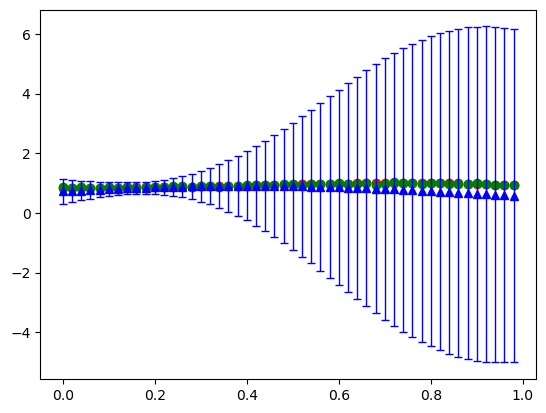

N = 2
M = 14
N2 = 50
[8, 40]
2


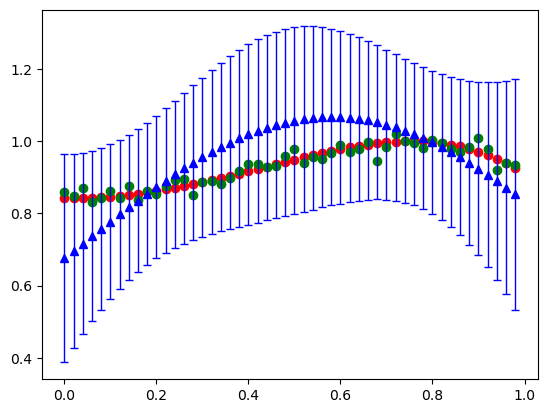

N = 3
M = 14
N2 = 50
[8, 40, 39]
3


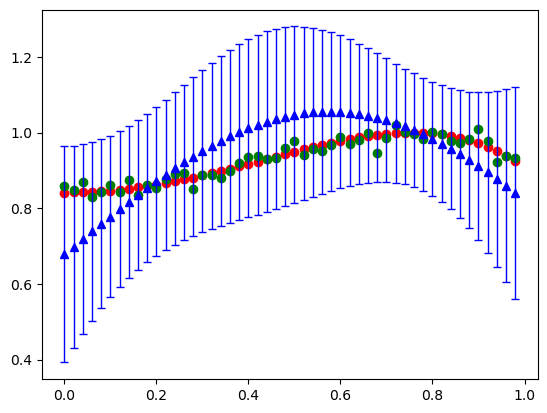

N = 4
M = 14
N2 = 50
[8, 40, 39, 37]
4


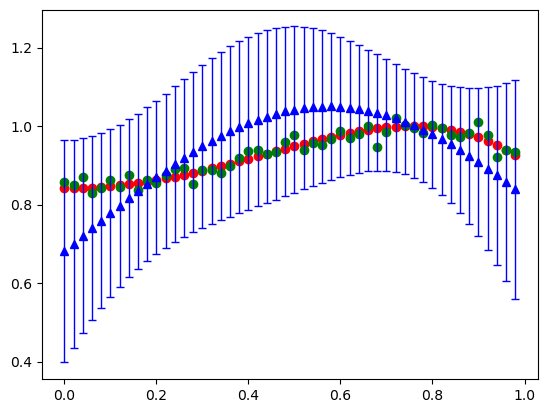

N = 5
M = 14
N2 = 50
[8, 40, 39, 37, 38]
5


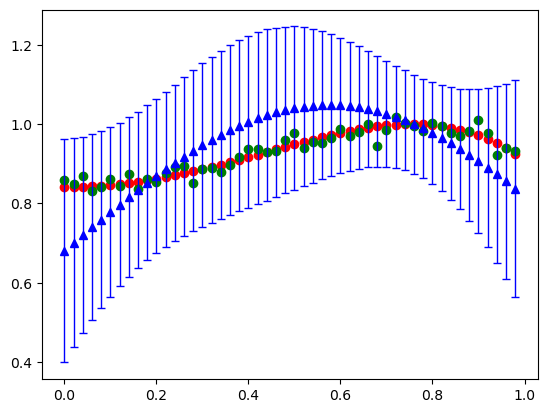

N = 6
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8]
6


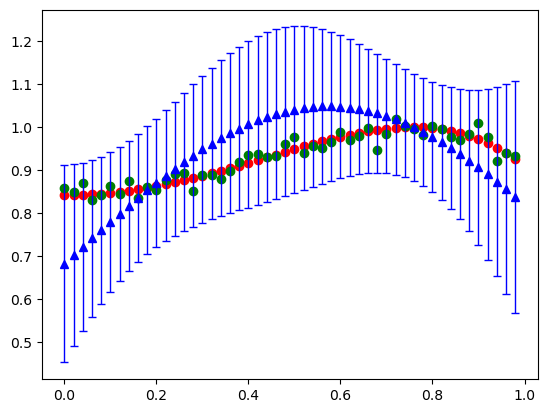

N = 7
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10]
7


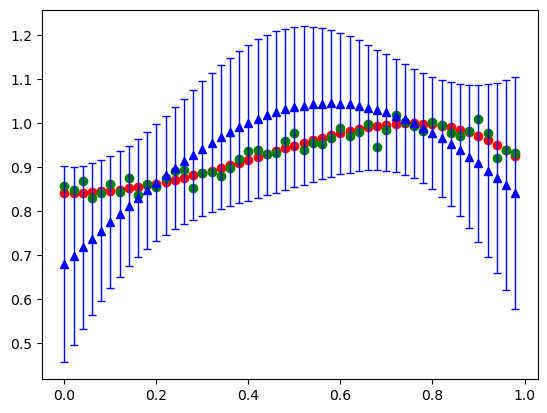

N = 8
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46]
8


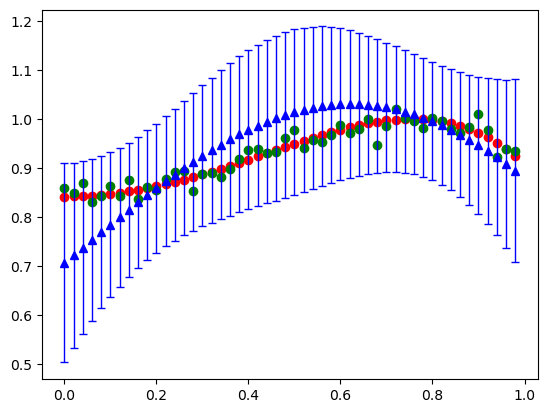

N = 9
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5]
9


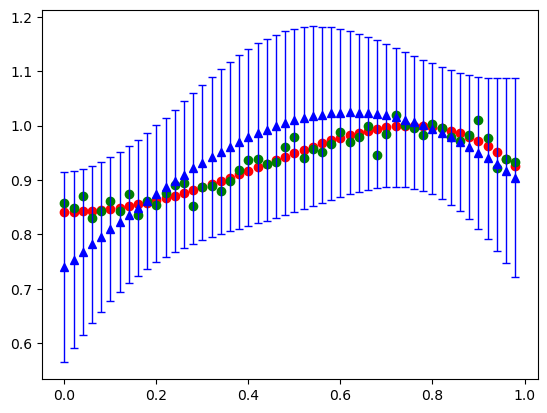

N = 10
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18]
10


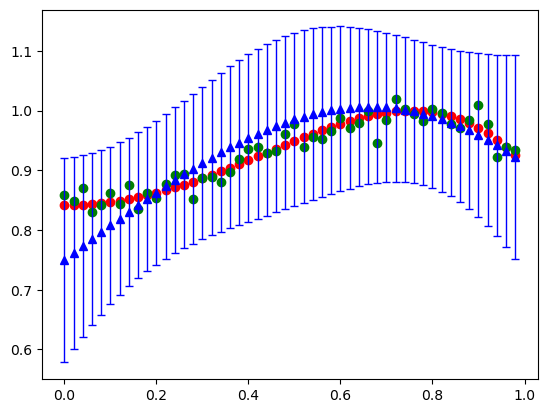

N = 11
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24]
11


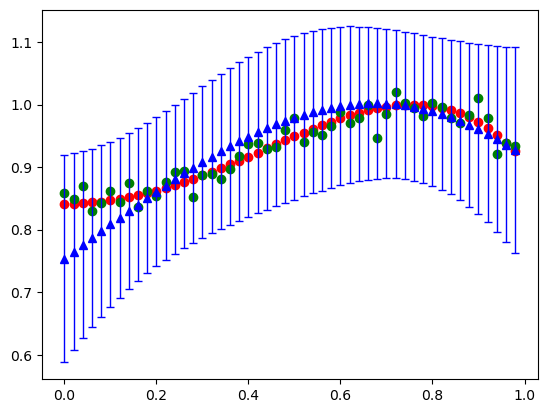

N = 12
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1]
12


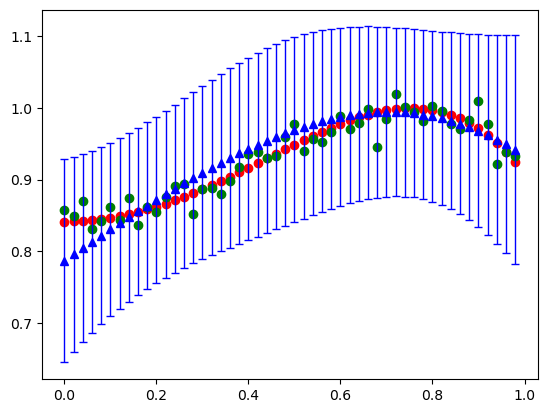

N = 13
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36]
13


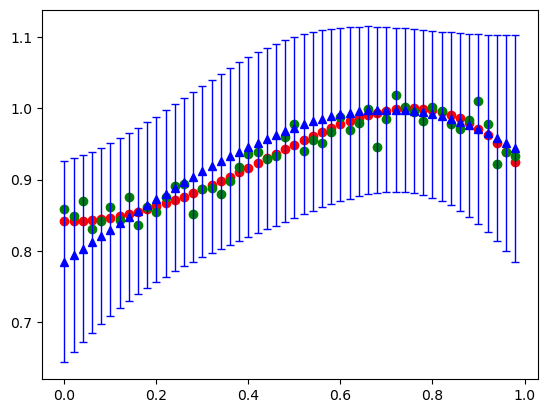

N = 14
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45]
14


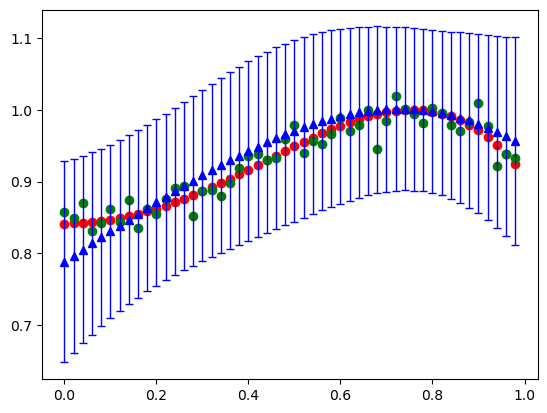

N = 15
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22]
15


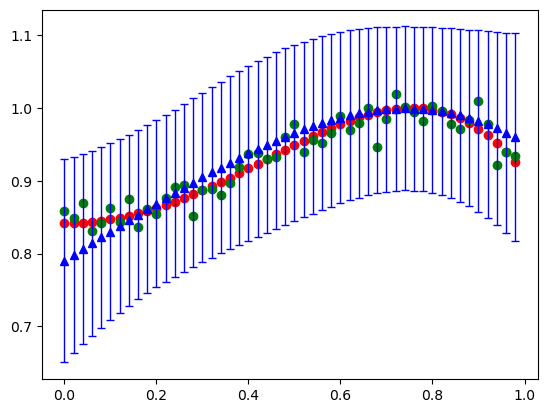

N = 16
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44]
16


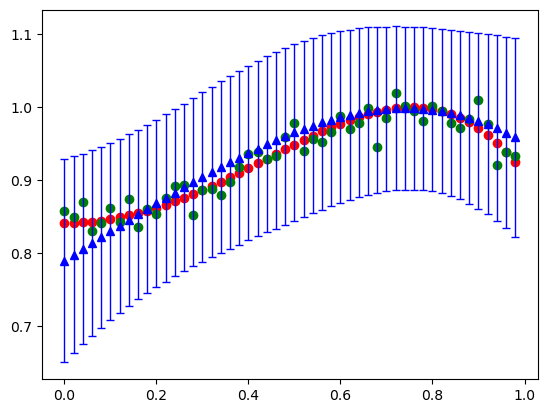

N = 17
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6]
17


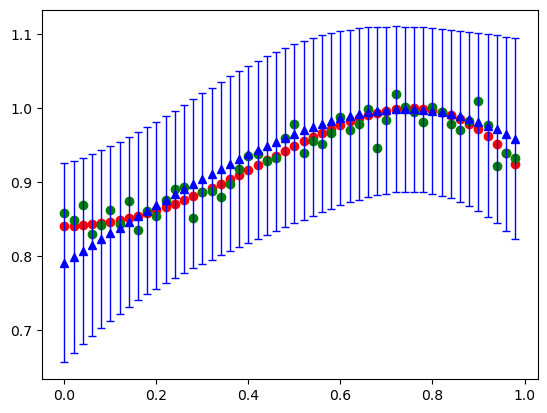

N = 18
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28]
18


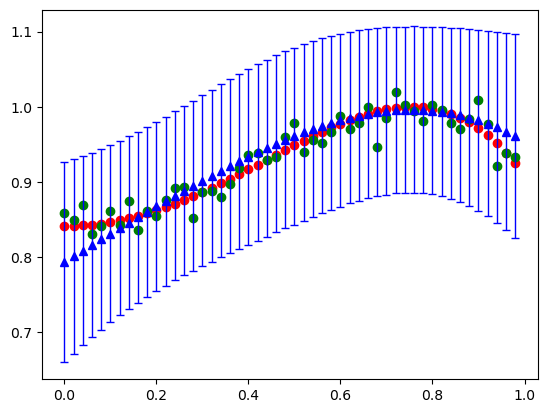

N = 19
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7]
19


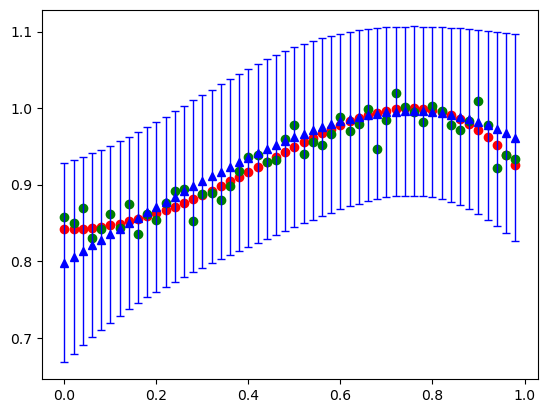

N = 20
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23]
20


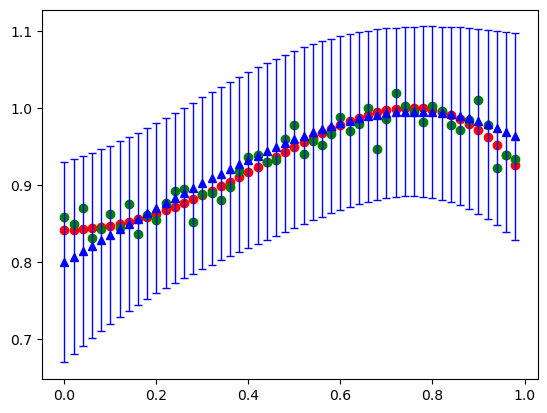

N = 21
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9]
21


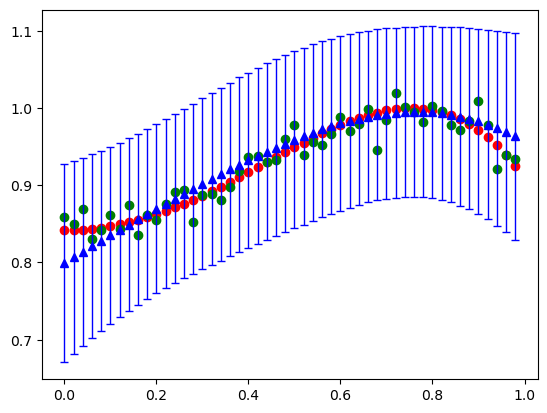

N = 22
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12]
22


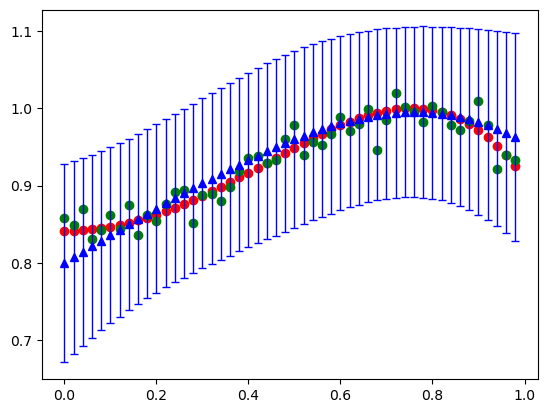

N = 23
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34]
23


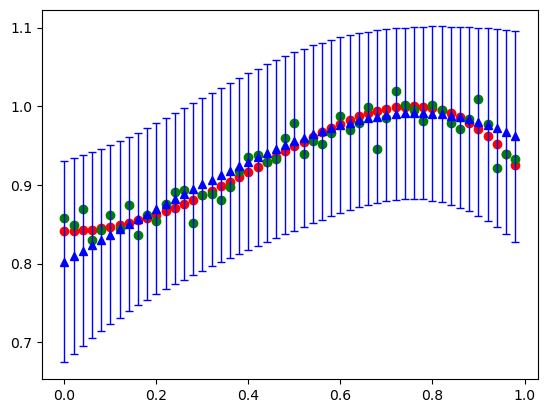

N = 24
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31]
24


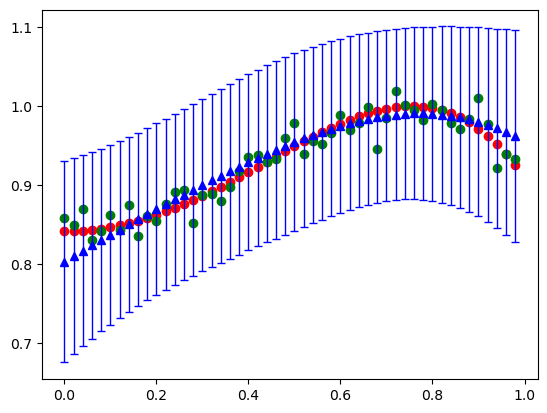

N = 25
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1]
25


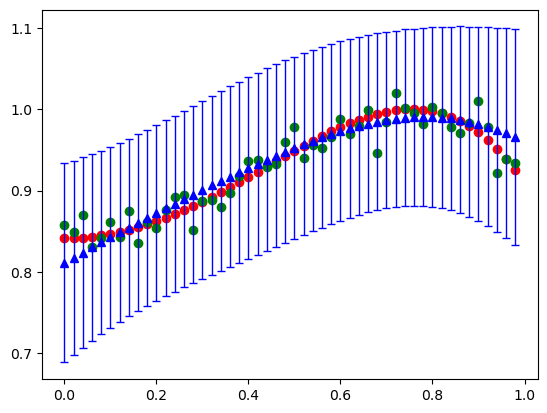

N = 26
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30]
26


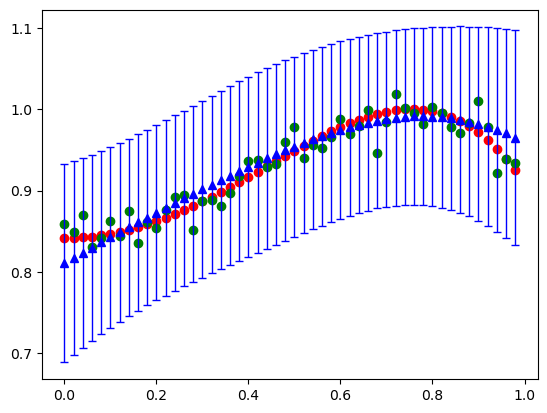

N = 27
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18]
27


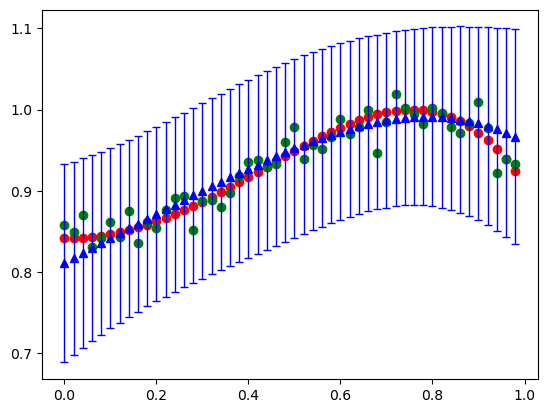

N = 28
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26]
28


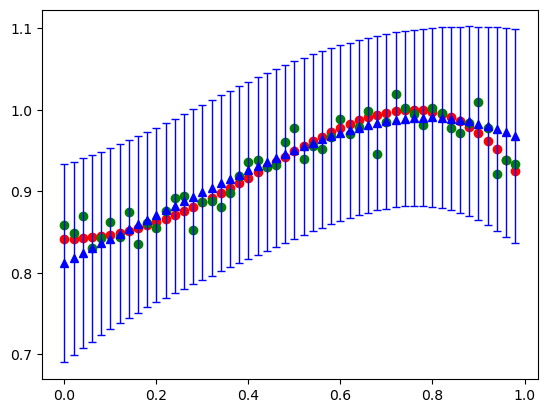

N = 29
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9]
29


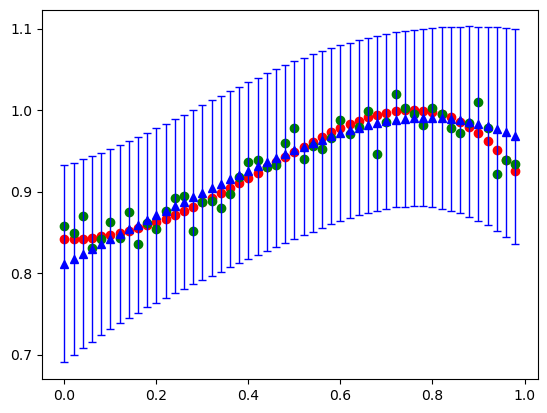

N = 30
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3]
30


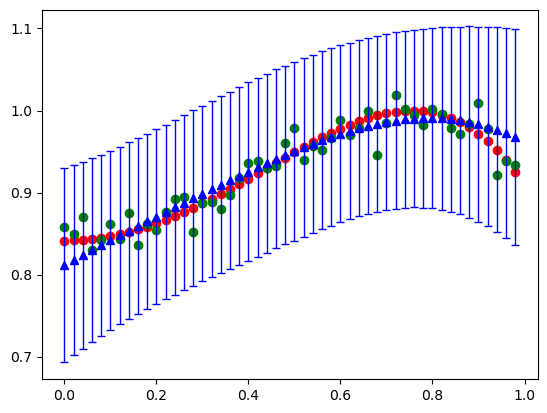

N = 31
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10]
31


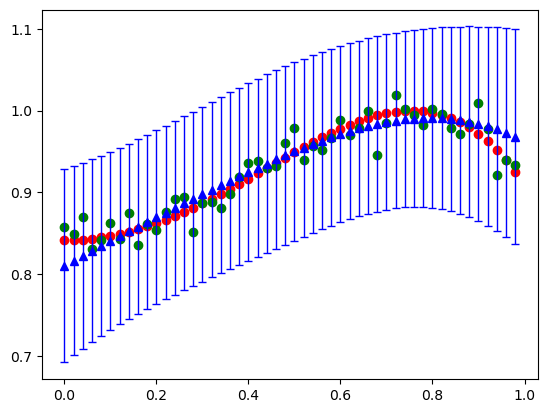

N = 32
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44]
32


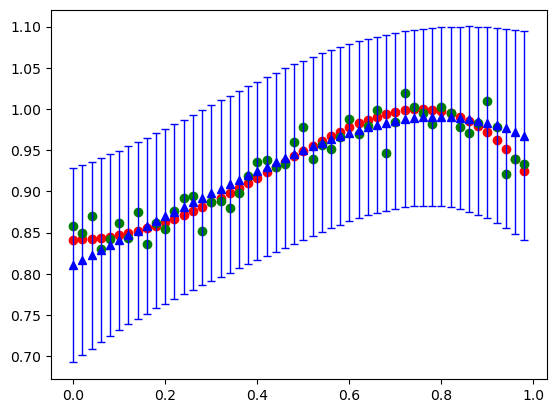

N = 33
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49]
33


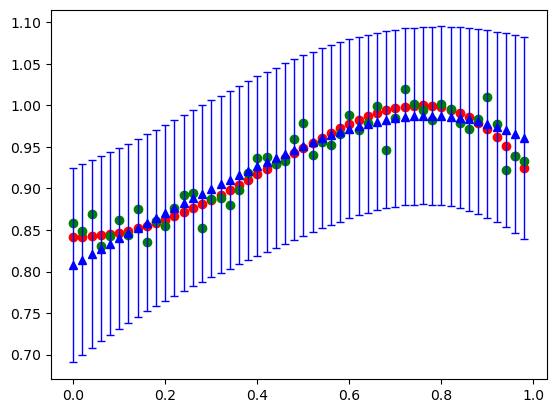

N = 34
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26]
34


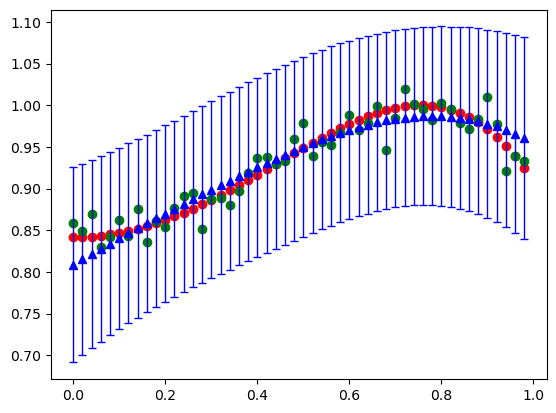

N = 35
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14]
35


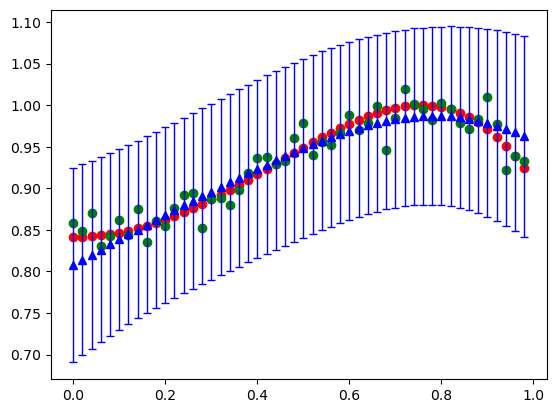

N = 36
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36]
36


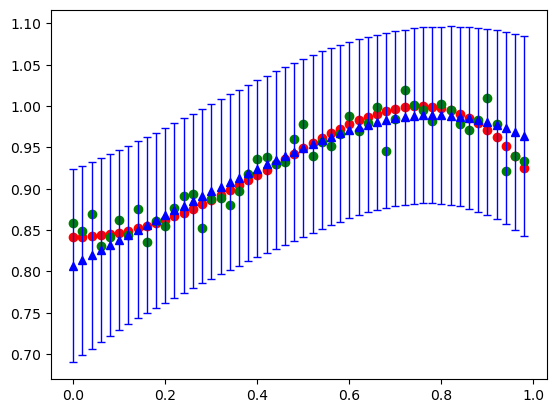

N = 37
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8]
37


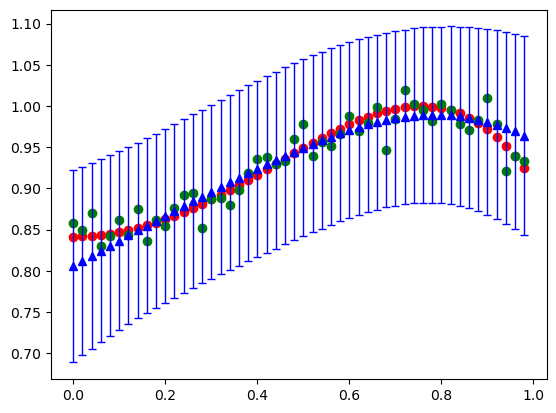

N = 38
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15]
38


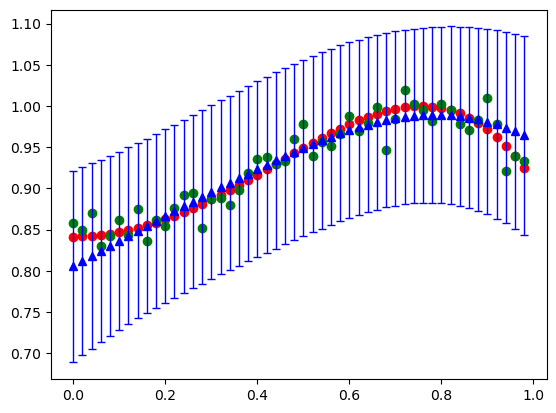

N = 39
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16]
39


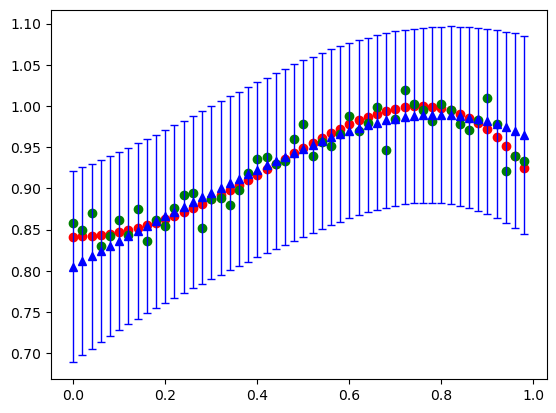

N = 40
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16]
40


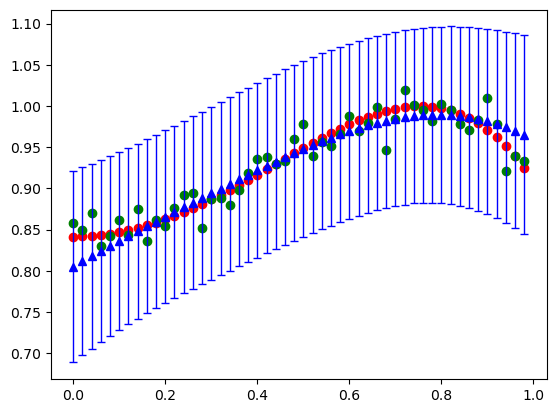

N = 41
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43]
41


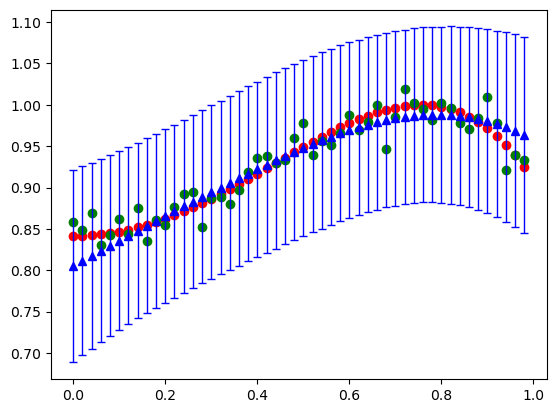

N = 42
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4]
42


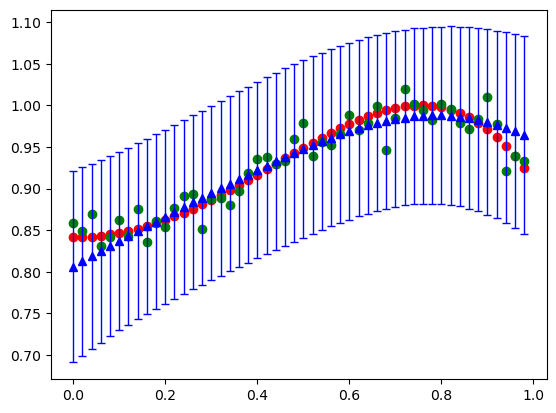

N = 43
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28]
43


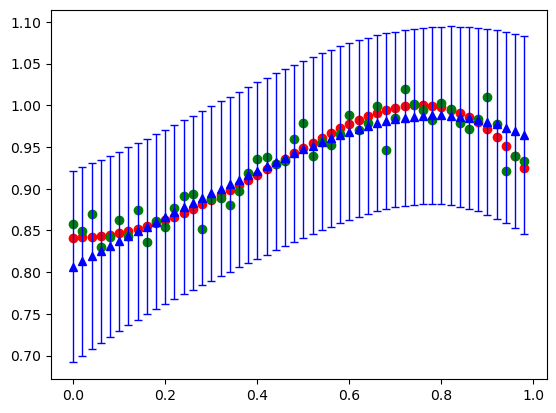

N = 44
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28, 8]
44


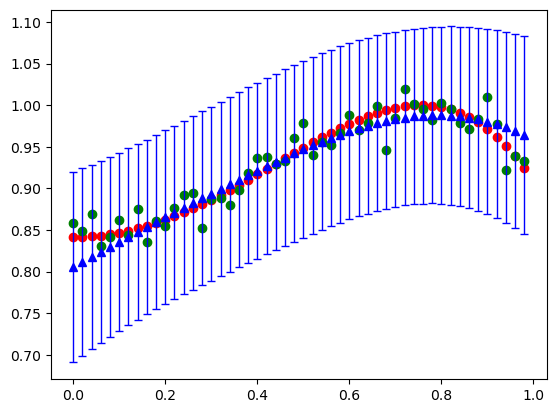

N = 45
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28, 8, 37]
45


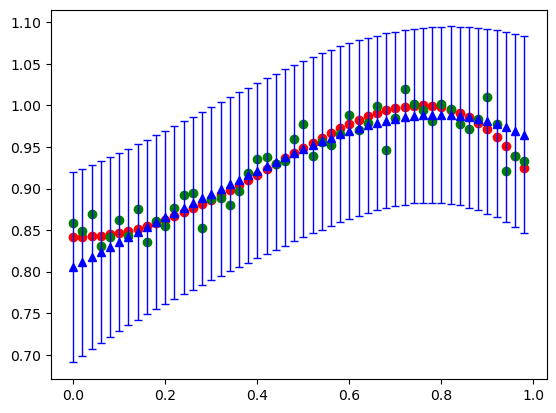

N = 46
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28, 8, 37, 32]
46


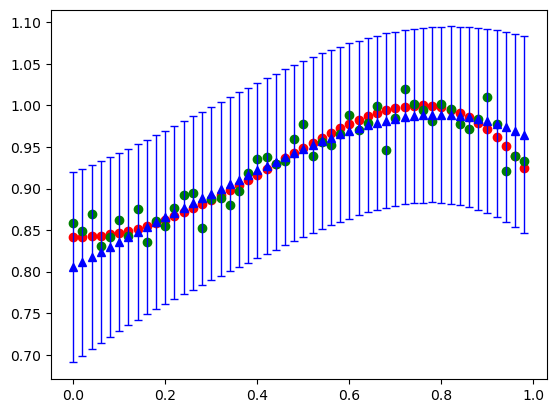

N = 47
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28, 8, 37, 32, 18]
47


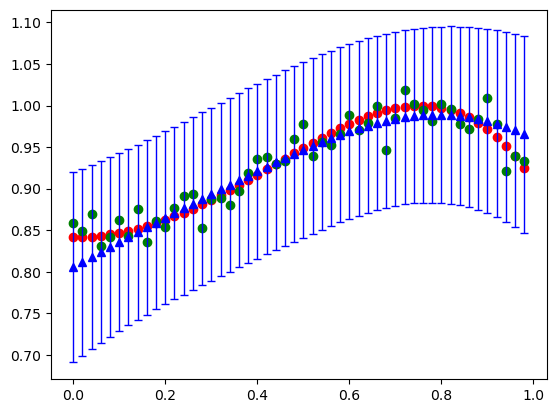

N = 48
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28, 8, 37, 32, 18, 20]
48


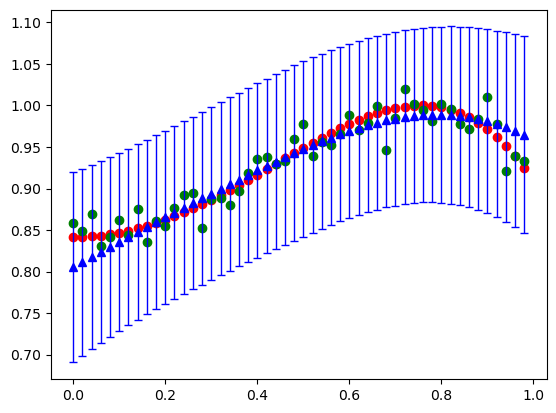

N = 49
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28, 8, 37, 32, 18, 20, 42]
49


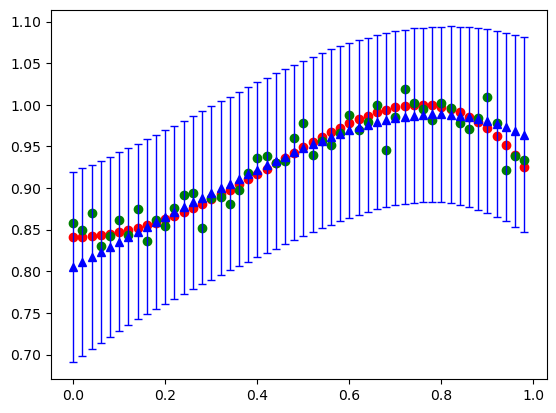

N = 50
M = 14
N2 = 50
[8, 40, 39, 37, 38, 8, 10, 46, 5, 18, 24, 1, 36, 45, 22, 44, 6, 28, 7, 23, 9, 12, 34, 31, 1, 30, 18, 26, 9, 3, 10, 44, 49, 26, 14, 36, 8, 15, 16, 16, 43, 4, 28, 8, 37, 32, 18, 20, 42, 1]
50


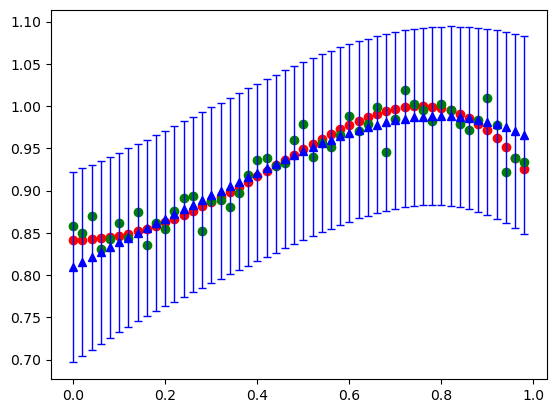

In [16]:
M=14
alpha=0.5
beta=10
s=0.5

x_temp = []
y_temp = []
w = []
for i in range(0, len(x)):
    t = np.random.randint(0,50)
    w.append(t)
    x_temp.append(x[t])
    y_temp.append(y_noise[t])
    ff, mn = pd(x_temp, y_temp, alpha, beta, M, s)
    S_star, M_star =  pdplot(x, mn, ff, s, beta)
    y_est_list = []
    for i in range (0,len(M_star)):
        y_est_list.append(M_star[i][0])
    plt.plot(x,y,'ro')
    plt.plot(x,y_noise,'go')
    plt.errorbar(x, y_est_list, yerr = S_star, fmt='b^', ecolor = 'blue',elinewidth=1, capsize = 3)
    print(w)
    print(len(w))
    plt.show()

# classification

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
import math

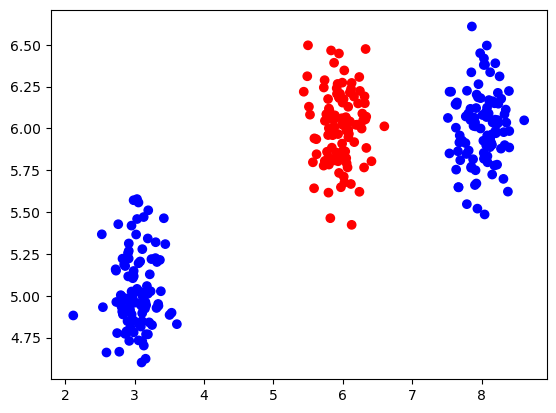

In [6]:
point_num = 100
N = point_num
K = 2
sigma = 0.05

mean = (6, 6)
cov = [[sigma, 0], [0, sigma]]
X1 = np.random.multivariate_normal(mean, cov, N)
c1 = ['red'] * len(X1)

mean = (3, 5)
cov = [[sigma, 0], [0, sigma]]
X2 = np.random.multivariate_normal(mean, cov, N)
c2 = ['blue'] * len(X2)

mean = (8, 6)
cov = [[sigma, 0], [0, sigma]]
X3 = np.random.multivariate_normal(mean, cov, N)
c3 = ['blue'] * len(X3)

X = np.concatenate((X1, X2, X3))
color = np.concatenate((c1, c2, c3))

T = np.zeros([len(X),K])
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n][0] = 1
    if(n>=N and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1
        
T = T.astype(int)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()

In [3]:
def gau2(x, mu, s):
    G = np.exp(-((x[0] - mu) ** 2+(x[1] - mu) ** 2) / (2 * s ** 2))
    return G

In [4]:
def sig2(a):
    sigmoid = 1 / (1 + np.exp(-a))
    return sigmoid

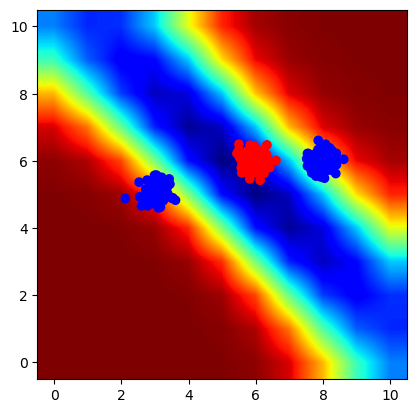

In [7]:
m = 10
u = np.arange(10)
alpha = 20
s = 5
count = 0
w = np.zeros((m, 1))

while count < 100:
    f = np.zeros((300, m))
    r = np.zeros((300, 300))
    for i in range(300):
        for j in range(m):
            f[i][j] = gau2(X[i],u[j],s)
    an = np.dot(w.T, f.T) 
    y = sig2(an) 
    for i in range(300):
        r[i][i] = y[0, i] * (1 - y[0, i])        

    temp = np.linalg.inv(np.linalg.inv(alpha * np.eye(m)) + np.dot(np.dot(f.T, r), f))
    tempx = y.T - np.array(T[:, 1]).reshape(300, 1) 
    a = np.dot(temp, (np.dot(np.linalg.inv(alpha * np.eye(m)), w) + np.dot(f.T, tempx)))
    w = w - a 
    count = count + 1

p = np.zeros((11, 11))
ff = np.zeros((1, m))
for i in range (11):
    for j in range (11):
        for k in range(m):
            ff[0, k] = np.exp((-(i - u[k])**2 - (j - u[k])**2)/(2 * (s**2)))
        a = np.dot(ff, w)
        sigma = np.dot(np.dot(ff,temp),ff.T)
        p[i, j] = 1 - 1 / (1 + np.exp(a / (1 + np.sqrt((np.pi / 8) * sigma))))
plt.imshow(p, interpolation='bilinear', origin='lower', cmap=plt.cm.jet)
T = np.zeros([len(X),K])
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n][0] = 1
    if(n>=N and n<len(X1)+len(X2)+len(X3)):
        T[n][1] = 1      
T = T.astype(int)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=color)
plt.show()